### Loading data and Scale

In [17]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import scipy.io as spio

mat = spio.loadmat('hw4/annthyroid.mat')
X = mat['X']
y = mat['y']
y = y[:, 0]

## Task 1.) Visualization

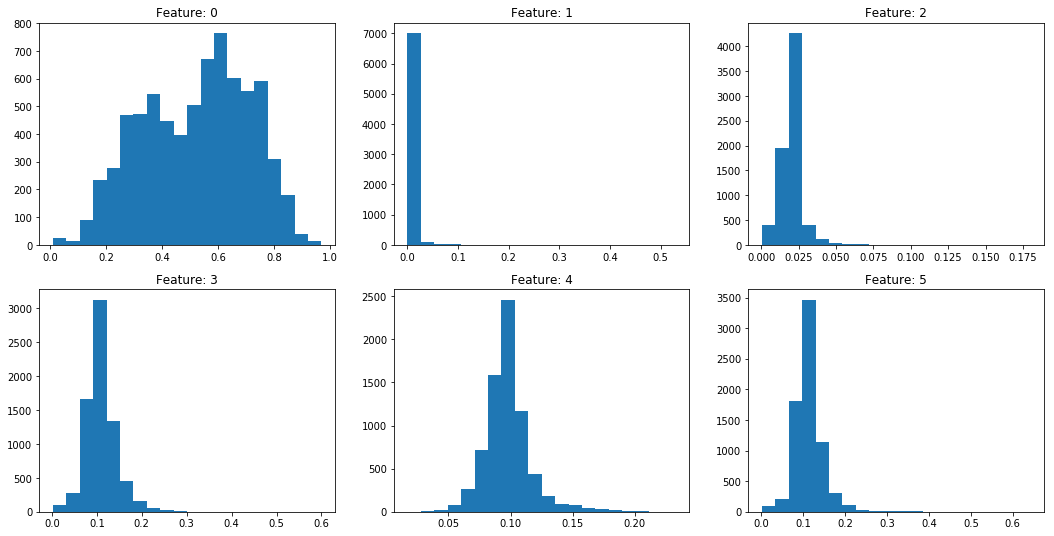

In [25]:
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

#Visualizing the univariate distribution of each feature(joint)
fig, axes = plt.subplots(2, 3, figsize=(18,9))
for i, ax in enumerate(axes.ravel()):
    ax.hist(X[:, i], bins=20)
    ax.set_title("{}: {}".format("Feature", i))
plt.show()

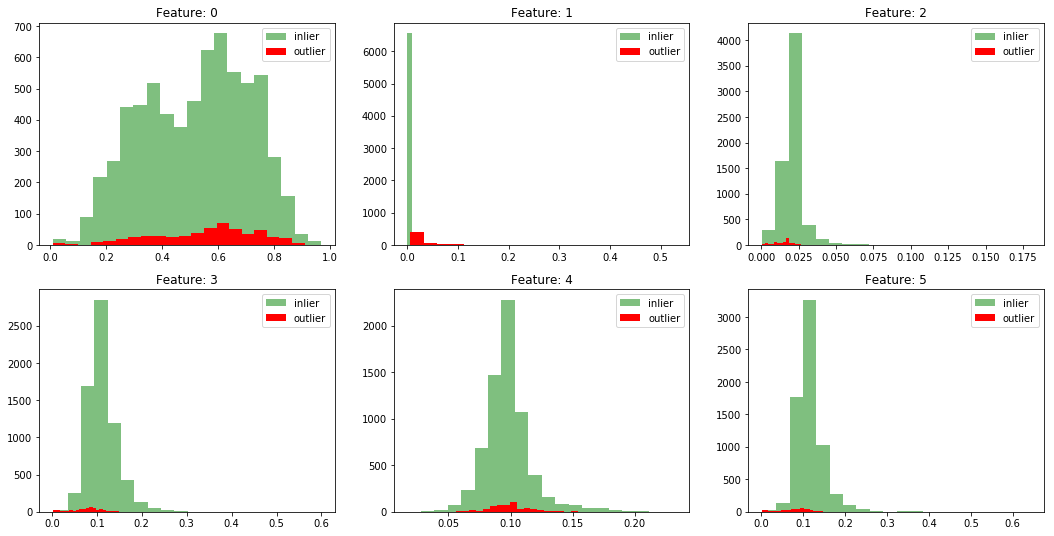

In [26]:
#Visualizing the univariate distribution of each feature(per class)
fig, axes = plt.subplots(2,3, figsize=(18, 9))
for i, ax in enumerate(axes.ravel()):
    ax.hist(X[y == 0, i], bins=20, alpha = 0.5, color = 'green', label='inlier')
    ax.legend(prop={'size': 10})
    ax.hist(X[y == 1, i], bins=20, color = 'red', label='outlier')
    ax.legend(prop={'size': 10})
    ax.set_title("{}: {}".format("Feature", i))
plt.show()

### 1.1) PCA

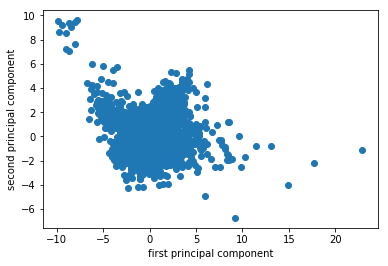

In [23]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# PCA scatter plot without making use of ground truth labels

pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=2)) 
X_pca_scaled = pca_scaled.fit_transform(X)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1])
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

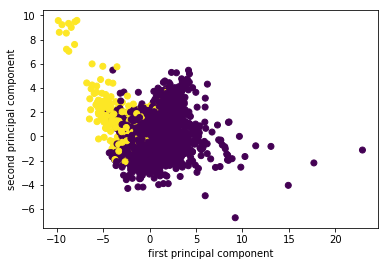

In [24]:
# PCA scatter plot after making use of ground truth labels to color the points
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=y)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.show()

##### The explained variance ratio in PCA was plotted. A good threshold for the number of principal components if we wanted to reduce the dimensionality of the data to compress it can be 4 because there's a kink at the 4th component in the graph and the 5th component does not explain any additional variance in the dataset.

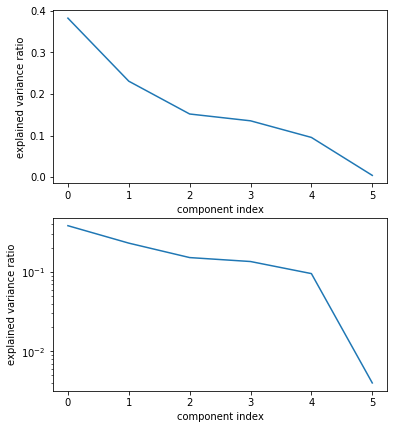

In [33]:
pca_scaled = make_pipeline(StandardScaler(), PCA())
pca_scaled.fit(X, y)
pca = pca_scaled.named_steps['pca']

fig, axes = plt.subplots(2, figsize=(6, 7))
axes[0].plot(pca.explained_variance_ratio_)
axes[1].semilogy(pca.explained_variance_ratio_)
for ax in axes:
    ax.set_xlabel("component index")
    ax.set_ylabel("explained variance ratio")

### 1.2) t-SNE

In [36]:
from sklearn.manifold import TSNE

tsne_scaled = make_pipeline(StandardScaler(), TSNE())
X_tsne = tsne_scaled.fit_transform(X)

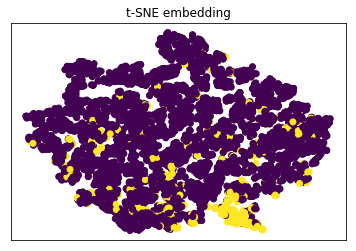

In [38]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title("t-SNE embedding")
plt.xticks(())
plt.yticks(())
plt.show()

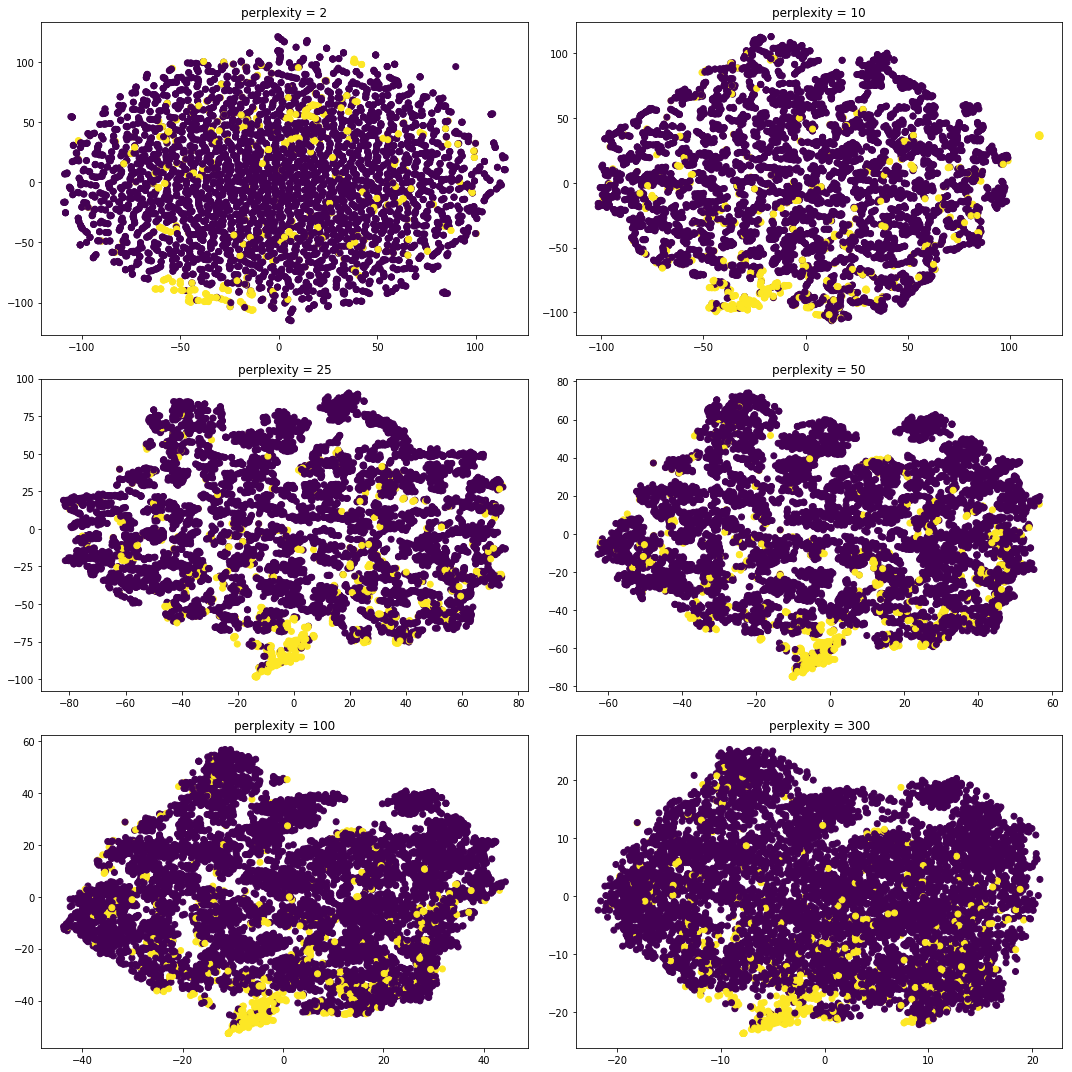

In [39]:
# Tuning perplexity parameter for t-SNE:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for ax, perplexity in zip(axes.ravel(), [2, 10, 25, 50, 100, 300]):
    tsne_scaled = make_pipeline(StandardScaler(), TSNE(perplexity=perplexity, random_state=0))
    X_tsne = tsne_scaled.fit_transform(X)
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
    ax.set_title("perplexity = {}".format(perplexity))
fig.tight_layout()
plt.show()

Even though we can observe the yellow cluster in the bottom of the distribution, many points are still embedded randomly across the distribution for all perplexity parameters.

## Task 2.) Clustering

### 2.1) Models

n_clusters: 4
[(0, 1092), (1, 3460), (2, 2586), (3, 62)]


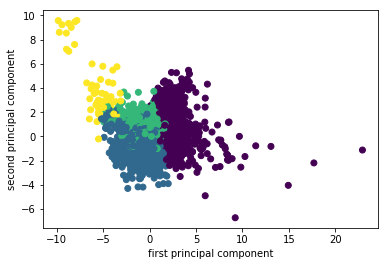

n_clusters: 6
[(0, 538), (1, 2163), (2, 2235), (3, 2061), (4, 142), (5, 61)]


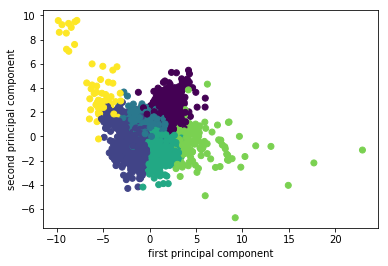

n_clusters: 8
[(0, 1376), (1, 962), (2, 11), (3, 2104), (4, 465), (5, 89), (6, 113), (7, 2080)]


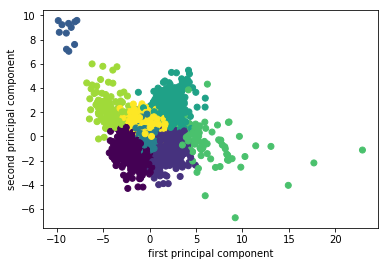

n_clusters: 10
[(0, 987), (1, 1512), (2, 782), (3, 1851), (4, 89), (5, 11), (6, 713), (7, 93), (8, 899), (9, 263)]


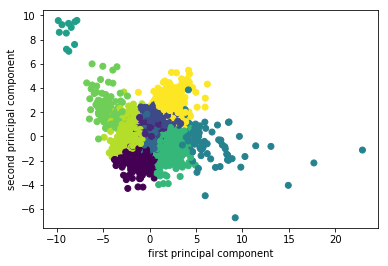

In [243]:
# K-Means, tuning 'n_clusters' for the following mentioned values:
from sklearn.cluster import KMeans
from collections import Counter

for n_clusters in range(4, 12, 2):
    km_scaled = make_pipeline(StandardScaler(), KMeans(n_clusters=n_clusters, random_state=0))
    km_scaled.fit(X)
    labels = km_scaled.named_steps['kmeans'].labels_   
    print("n_clusters:", n_clusters)
    print(sorted(Counter(labels).items()))
    count = 0
    plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=labels)
    plt.xlabel("first principal component")
    plt.ylabel("second principal component")
    plt.show()

We believe n_clusters: 8 is the best parameter by looking at the cluster sizes. The total number of points in the clusters with relatively small number of elements must be at less 10% of the dataset, assuming normal distribution and the confidence level of 90%.

n_clusters: 5
[(0, 2163), (1, 4204), (2, 11), (3, 529), (4, 293)]


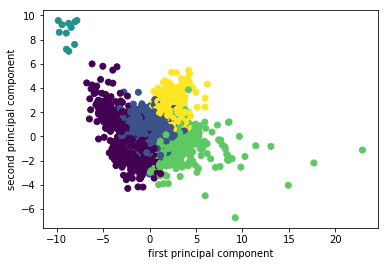

n_clusters: 6
[(0, 4204), (1, 529), (2, 166), (3, 1997), (4, 293), (5, 11)]


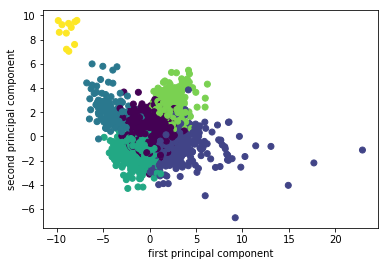

n_clusters: 8
[(0, 2649), (1, 500), (2, 166), (3, 1997), (4, 293), (5, 11), (6, 1555), (7, 29)]


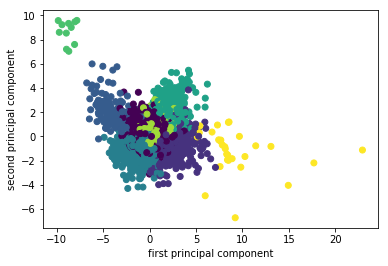

n_clusters: 10
[(0, 1997), (1, 1282), (2, 166), (3, 1367), (4, 293), (5, 11), (6, 1555), (7, 29), (8, 390), (9, 110)]


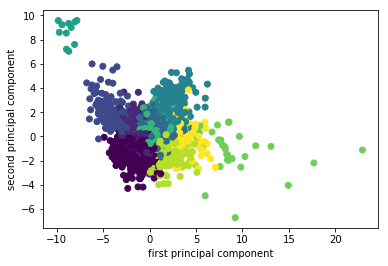

In [214]:
# Agglomerative Clustering, tuning 'n_clusters' for the following mentioned values:
from sklearn.cluster import AgglomerativeClustering

for n_clusters in [5, 6, 8, 10]:
    agg_scaled = make_pipeline(StandardScaler(), AgglomerativeClustering(n_clusters=n_clusters))
    agg_scaled.fit(X)
    labels = agg_scaled.named_steps['agglomerativeclustering'].labels_
    print("n_clusters:", n_clusters)
    print(sorted(Counter(labels).items()))
    plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=labels)
    plt.xlabel("first principal component")
    plt.ylabel("second principal component")
    plt.show()

Similarly, we believe n_clusters: 6 is the best parameter by looking at the cluster sizes.

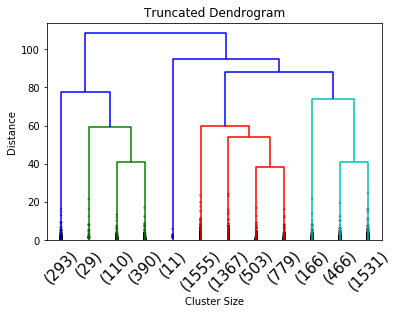

In [65]:
# Dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Z = linkage(X_scaled, 'ward')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)
plt.title('Truncated Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [239]:
# DBScan, tuning 'eps' for the following mentioned values:
for eps in np.logspace(-1, 1, 10):
    dbs = DBSCAN(eps=eps).fit(X_scaled)
    print("eps:", eps,"| Sizes: ", Counter(dbs.labels_).values(), "outliers: ", np.sum(dbs.labels_ == -1))


eps: 0.1 | Sizes:  dict_values([6951, 70, 90, 17, 8, 7, 7, 5, 13, 8, 5, 7, 6, 6]) outliers:  6951
eps: 0.16681005372 | Sizes:  dict_values([6630, 376, 10, 8, 11, 6, 5, 5, 7, 19, 8, 5, 10, 5, 6, 18, 5, 5, 7, 7, 6, 6, 5, 7, 5, 5, 5, 4, 4]) outliers:  6630
eps: 0.278255940221 | Sizes:  dict_values([4287, 4, 2591, 6, 4, 7, 6, 5, 11, 5, 17, 6, 10, 8, 2, 11, 46, 5, 5, 8, 5, 9, 7, 5, 6, 16, 6, 5, 8, 5, 8, 5, 9, 5, 5, 4, 5, 3, 5, 1, 5, 5, 4, 4, 4, 4, 3, 5]) outliers:  4287
eps: 0.464158883361 | Sizes:  dict_values([5473, 3, 1616, 5, 8, 8, 8, 6, 5, 5, 16, 9, 4, 10, 5, 4, 6, 4, 5]) outliers:  1616
eps: 0.774263682681 | Sizes:  dict_values([6638, 542, 12, 4, 4]) outliers:  542
eps: 1.29154966501 | Sizes:  dict_values([7052, 143, 5]) outliers:  143
eps: 2.15443469003 | Sizes:  dict_values([7160, 34, 6]) outliers:  34
eps: 3.5938136638 | Sizes:  dict_values([7181, 8, 11]) outliers:  8
eps: 5.99484250319 | Sizes:  dict_values([7186, 11, 3]) outliers:  3
eps: 10.0 | Sizes:  dict_values([7199, 1]) out

By looking at the number of outliers and cluster sizes, eps: 0.774 seems to be the reasonable parameter. We should not include too many points(we are looking for outliers) and at the same time enought points. 34 outliers are less then 0.5% of the dataset.

### 2.2) Evaluation

##### After tuning K-Means, it was found that n_clusters = 8 gave best ARI, NMI scores

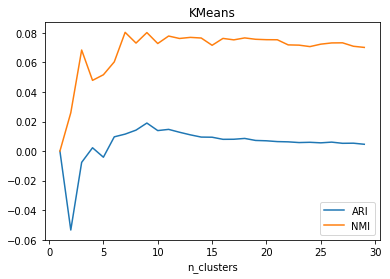

In [169]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
aris, nmis = [], []
for i in range(1, 30):
    km = KMeans(n_clusters=i).fit(X_scaled)
    ari = adjusted_rand_score(y, km.labels_)
    nmi = normalized_mutual_info_score(y, km.labels_)
    aris.append(ari)
    nmis.append(nmi)
plt.plot(range(1, 30), aris, label="ARI")
plt.plot(range(1, 30), nmis, label="NMI")
plt.legend()
plt.xlabel("n_clusters")
plt.title("KMeans")
plt.show()

In [170]:
print("ARI for n_clusters = 8: ", aris[8])
print("NMI for n_clusters = 8: ", nmis[8])

ARI for n_clusters = 8:  0.0189757224165
NMI for n_clusters = 8:  0.0801543179171


##### After tuning Agglomerative Clustering, it was found that n_clusters = 6 gave best ARI, NMI scores

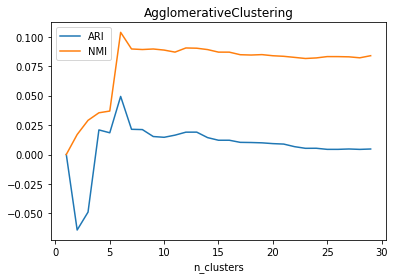

In [171]:
# Agglomerative Clustering
aris, nmis = [], []
for i in range(1, 30):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    ari = adjusted_rand_score(y, agg.labels_)
    nmi = normalized_mutual_info_score(y, agg.labels_)
    aris.append(ari)
    nmis.append(nmi)
plt.plot(range(1, 30), aris, label="ARI")
plt.plot(range(1, 30), nmis, label="NMI")
plt.legend()
plt.title("AgglomerativeClustering")
plt.xlabel("n_clusters")
plt.show()

In [172]:
print("ARI for n_clusters = 6: ", aris[6])
print("NMI for n_clusters = 6: ", nmis[6])

ARI for n_clusters = 6:  0.021409415517
NMI for n_clusters = 6:  0.0896343132373


##### After tuning DBSCAN, it was found that eps = 0.774 gave best ARI, NMI scores

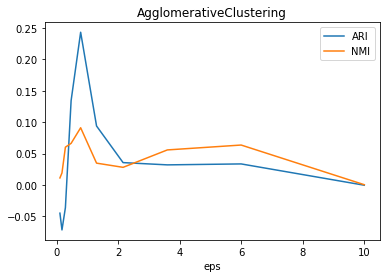

In [196]:
aris, nmis = [], []
for i in np.logspace(-1, 1, 10):
    dbs = DBSCAN(eps=i).fit(X_scaled)
    ari = adjusted_rand_score(y, dbs.labels_)
    nmi = normalized_mutual_info_score(y, dbs.labels_)
    ami = adjusted_mutual_info_score(y, dbs.labels_)
    aris.append(ari)
    nmis.append(nmi)
plt.plot(np.logspace(-1, 1, 10), aris, label="ARI")
plt.plot(np.logspace(-1, 1, 10), nmis, label="NMI")
plt.legend()
plt.title("AgglomerativeClustering")
plt.xlabel("eps")
plt.show()

In [198]:
print("ARI for eps = 0.774: ", aris[4])
print("NMI for eps = 0.774: ", nmis[4])

ARI for eps = 0.774:  0.243102584567
NMI for eps = 0.774:  0.0911641864375


## Task 3.) Outlier Detection

### 3.1) EllipticEnvelope, OneClassSVM and IsolationForest

In [108]:
mat = spio.loadmat('hw4/annthyroid.mat')
X = mat['X']
y = mat['y'][:, 0].astype(int)
y[y == 1] = -1
y[y == 0] = 1

Since we can use the proportion of outliers in the dataset, we store the proportion and use it to fit models.

In [211]:
outlier_ratio = np.mean(y == -1)

from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EllipticEnvelope

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ee = EllipticEnvelope(contamination=outlier_ratio).fit(X_scaled)
pred1 = ee.predict(X_scaled)

In [112]:
from sklearn.svm import OneClassSVM

oneclass = OneClassSVM(nu=outlier_ratio).fit(X_scaled)
pred2 = oneclass.predict(X_scaled)

In [113]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=outlier_ratio).fit(X_scaled)
pred3 = iso.predict(X_scaled) 

Use PCA to visualize the results.

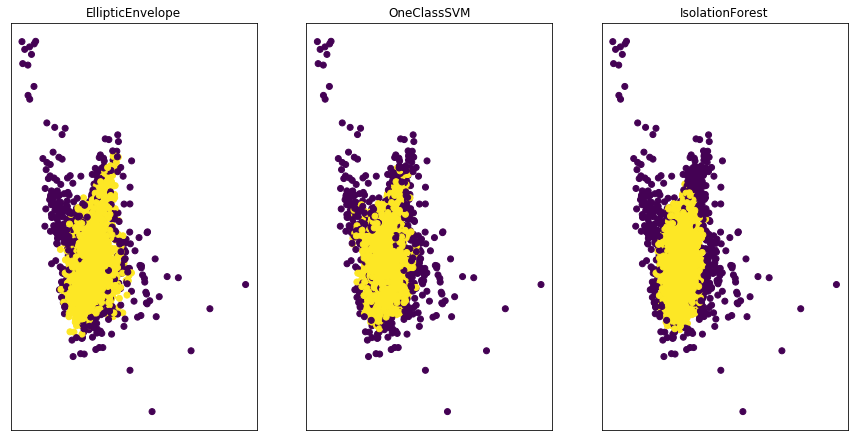

In [149]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (), 'yticks':()},  figsize=(15, 7.5))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=pred1)
axes[0].set_title("EllipticEnvelope")
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=pred2)
axes[1].set_title("OneClassSVM")
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=pred3)
axes[2].set_title("IsolationForest")
plt.show()

By visualizing three approaches, EllipticEnvelope seems to be the best. OneClasSVM identifies more points around the center of the cluster as outliers and IsolationForest identifies all points that are around the boundary as outliers. The outlier classification by EllipticEvelope seems to better represents the general distribution of inliers, which are colored yellow. 

In [151]:
from sklearn.metrics import roc_auc_score, average_precision_score

ee_auc = roc_auc_score(y, ee.decision_function(X_scaled))
oneclass_auc = roc_auc_score(y, oneclass.decision_function(X_scaled))
iso_auc = roc_auc_score(y, iso.decision_function(X_scaled))

print("AUC for EllipticEnvelope: {: .3f}".format(ee_auc))
print("AUC for OneClass SVM: {: .3f}".format(oneclass_auc))
print("AUC for IsolationForest: {: .3f} \n".format(iso_auc))

ee_pre = average_precision_score(y, pred1)
oneclass_pre = average_precision_score(y, pred2)
iso_pre = average_precision_score(y, pred3)

print("Average Precision for EllipticEnvelope: {: .3f}".format(ee_pre))
print("Average Precision for OneClass SVM: {: .3f}".format(oneclass_pre))
print("Average Precision for IsolationForest: {: .3f}".format(iso_pre))

AUC for EllipticEnvelope:  0.919
AUC for OneClass SVM:  0.565
AUC for IsolationForest:  0.802 

Average Precision for EllipticEnvelope:  0.955
Average Precision for OneClass SVM:  0.938
Average Precision for IsolationForest:  0.944


EllipticEnvelope performs better than other two approaches.

Based on ARI and NMI, DBSCAN was the best clustering approach for outlier detection. Now we wan to compare DBSCAN with EllipticEnvelope.

In [206]:
dbscan = DBSCAN(eps=0.774).fit(X_scaled)
print("DBSCAN _ True Positive: ", sum(y[dbscan.labels_ == -1]), "False Negative", sum(y[dbscan.labels_ != -1]))
print("EllipticEnvelope _ True Positive: ", sum(y[pred1 == -1]), "False Negative", sum(y[pred1 != -1]))

DBSCAN _ True Positive:  177 False Negative 357
EllipticEnvelope _ True Positive:  245 False Negative 289


Using the ground-truth, EllipticEnvelop identifies more outliers with less errors.

## Task 4.) Imbalanced Classification

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

mat = spio.loadmat('hw4/annthyroid.mat')
X = mat['X']
y = mat['y'][:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
param_grid = {'logisticregression__C': np.logspace(-2, 3, 10)}
lr = GridSearchCV(lr_pipe, cv=10, param_grid=param_grid, scoring="average_precision")
lr.fit(X_train, y_train)
print(lr.best_params_)
lr_auc = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
print("AUC for LogisticRegression: {: .3f}".format(lr_auc))

lr_pre = average_precision_score(y_train, lr.predict_proba(X_train)[:, 1])
print("Average Precision for LogisticRegression: {: .3f}\n".format(lr_pre))

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced', random_state=0))
param_grid = {'logisticregression__C': np.logspace(1, 5, 10)}
lr = GridSearchCV(lr_pipe, cv=10, param_grid=param_grid, scoring="average_precision")
lr.fit(X_train, y_train)
print(lr.best_params_)
lr_auc = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
print("AUC for Balanced LogisticRegression: {: .3f}".format(lr_auc))

lr_pre = average_precision_score(y_train, lr.predict_proba(X_train)[:, 1])
print("Average Balanced Precision for LogisticRegression: {: .3f}".format(lr_pre))

{'logisticregression__C': 1000.0}
AUC for LogisticRegression:  0.971
Average Precision for LogisticRegression:  0.747

{'logisticregression__C': 27.825594022071243}
AUC for Balanced LogisticRegression:  0.988
Average Balanced Precision for LogisticRegression:  0.809


In [240]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'randomforestclassifier__max_depth': range(6, 15)}
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0))
rf = GridSearchCV(rf_pipe, cv=10,  param_grid=param_grid, scoring="average_precision")
rf.fit(X_train, y_train)
print(rf.best_params_)
rf_auc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
print("AUC for Balanced LogisticRegression: {: .3f}".format(rf_auc))

rf_pre = average_precision_score(y_train, rf.predict_proba(X_train)[:, 1])
print("Average Precision for Balanced LogisticRegression: {: .3f}\n".format(rf_pre))

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight='balanced', random_state=0))
rf = GridSearchCV(rf_pipe, cv=10,  param_grid=param_grid, scoring="average_precision")
rf.fit(X_train, y_train)
print(rf.best_params_)
rf_auc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
print("AUC for Balanced LogisticRegression: {: .3f}".format(rf_auc))

rf_pre = average_precision_score(y_train, rf.predict_proba(X_train)[:, 1])
print("Average Precision for Balanced LogisticRegression: {: .3f}\n".format(rf_pre))

{'randomforestclassifier__max_depth': 8}
AUC for Balanced LogisticRegression:  0.999
Average Precision for Balanced LogisticRegression:  0.992

{'randomforestclassifier__max_depth': 9}
AUC for Balanced LogisticRegression:  0.999
Average Precision for Balanced LogisticRegression:  0.985



LogisticRegression and RandomForestClassifier provide higher AUC than outlier detection approaches. LogisticRegression, however, has the loWest average precision. RandomForestClassifier gives the highest average precision, which is 0.985. Changing the class-weight does help for both LogisticRegression and RandomForestClassifier.

In [193]:
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
print("Test AUC for Balanced LogisticRegression: {: .3f}".format(rf_auc))

rf_pre = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print("Test Average Precision for Balanced LogisticRegression: {: .3f}\n".format(rf_pre))

AUC for Balanced LogisticRegression:  0.992
Average Precision for Balanced LogisticRegression:  0.937



Finally, We can verify that RandomForestClassifier performs very well on the test set.